<a href="https://colab.research.google.com/github/luishpinto/astrophysics/blob/main/planetary_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.constants import year, hour, au, G
from astropy.constants import M_sun

import matplotlib.pyplot as plt

In [2]:
M = M_sun.value

# orbital parameters of planets
# see https://nssdc.gsfc.nasa.gov/planetary/factsheet/
# mass in kg
m = 1e24 * np.array([0.33011, 4.8675, 5.9723, 0.64171,
                     1898.19, 568.34, 86.813, 102.413])

# semi-major axis in m
a = 1e9 * np.array([57.9, 108.21, 149.60, 227.92,
                    778.57, 1433.53, 2872.46, 4495.06])

In [3]:
# use Kepler's 3rd law to calculate the period in s
T_test_mass = 2.0 * np.pi * (G * M)**(-1/2) * a**(3/2)
T_two_body = 2.0 * np.pi * (G * (M + m))**(-1/2) * a**(3/2)

In [4]:
print('T [yr]\t\tdev[hr]\t\tdev rel.')
for i,j in zip(T_test_mass, T_two_body):
  dev = i - j
  if (dev > hour):
    print('{:6.2f}\t\t{:<7.1f}\t\t{:.1e}'.format(j/year, dev/hour, dev/i))
  else:
    print('{:6.2f}\t\t{:7.4f}\t\t{:.1e}'.format(j/year, dev/hour, dev/i))

T [yr]		dev[hr]		dev rel.
  0.24		 0.0002		8.3e-08
  0.62		 0.0066		1.2e-06
  1.00		 0.0132		1.5e-06
  1.88		 0.0027		1.6e-07
 11.88		49.6   		4.8e-04
 29.68		37.2   		1.4e-04
 84.20		16.1   		2.2e-05
164.82		37.2   		2.6e-05


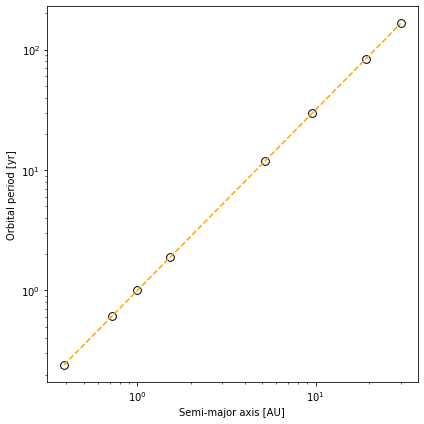

In [5]:
fig = plt.figure(figsize = (6.0, 6.0))
plt.loglog(a/au, T_test_mass/year, '--', color = 'orange', label = 'test mass')
plt.scatter(a/au, T_two_body/year, color = 'white', edgecolor = 'black', s = 60)
plt.xlabel('Semi-major axis [AU]')
plt.ylabel('Orbital period [yr]')
plt.tight_layout()
plt.show()